# AS3--Boosting and Bagging Models with Hyperparameter Tuning

Richard Yang

### 1. Data Processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, skipinitialspace=True)
adult_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# append the column names to the dataframe

list_columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
adult_df.columns = list_columns
adult_df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Check your dataframe shape to verify that you have the correct # of rows and columns.
adult_df.shape

(32561, 15)

In [5]:
# d) Drop the 3rd column from the data (it is referred to as "fnlwgt" on UCI's website and is not necessary in this homework)

adult_df.drop('fnlwgt', axis=1, inplace=True)



In [6]:
# f) Use the .replace() method to make the following changes to the "salary" column: "<=50K" should become 0. ">50K" should become 1

adult_df['salary'].replace({'<=50K':0, '>50K':1}, inplace=True)
adult_df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [7]:
# e-h

# Create your X dataframe (just your predictors). It should include every feature except for the target variable which is "salary".

X = adult_df.drop('salary', axis=1)
X.shape

(32561, 13)

In [8]:
# Create your y dataframe (just your target variable). It should only be "salary". The values should only be 0 and 1.
# convert y to 0 and 1

y = adult_df['salary']
y.shape

(32561,)

In [9]:
X_encoded = pd.get_dummies(X)
X_encoded.shape

(32561, 107)

In [10]:
# Split data into train / test set using an 70/30 split. Verify that you have the same number of columns in your X_train and X_test.

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

X_train.shape   # 70% of 32561 = 22792


(22792, 107)

## 2. Random Forest Classifier - Base Model:

In [43]:
# Start by creating a simple Random Forest only using default parameters - this will let us compare Boosting methods to Random Forest in binary classification problems.

# a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

# c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)




array([[6835,  620],
       [ 870, 1444]], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7455
           1       0.70      0.62      0.66      2314

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [45]:
# d) Calculate the AUC score.

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
auc_score

0.8897333004074577

In [46]:
# e) Identify the top 5 features. Feel free to print a list.

feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(5)

,importance
age,0.227371
hours-per-week,0.112285
capital-gain,0.102617
education-num,0.066930
marital-status_Married-civ-spouse,0.052850


In [47]:
# Using the model from part B, predict for the train data. Look at the classification report for the train data - is there overfitting for the RandomForest model happening?

y_pred_train = rf.predict(X_train)
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17265
           1       0.97      0.95      0.96      5527

    accuracy                           0.98     22792
   macro avg       0.98      0.97      0.97     22792
weighted avg       0.98      0.98      0.98     22792



Since the Precision and Recall in the train data result is much higher than the corresponding metrics in the test data report. It is likely that there is an overfitting.

To determine whether overfitting is occurring in the RandomForest model, you can look at the classification report for the train data and compare it with the classification report for the test data.

If the classification report for the train data shows significantly higher accuracy and F1 scores than the classification report for the test data, then there is a high likelihood that the model is overfitting. Overfitting occurs when the model becomes too complex and starts to fit to noise in the training data rather than the underlying patterns.

Some indicators of overfitting in the classification report include:

A much higher accuracy score on the train data compared to the test data
A much higher F1 score on the train data compared to the test data
A higher precision score and a lower recall score on the train data compared to the test data
Therefore, to answer this question, you can compare the classification report for the train data with the classification report for the test data and check for significant differences in the performance metrics, especially accuracy and F1 scores. If the train data has much higher scores than the test data, then it is likely that the model is overfitting.

## 3. AdaBoost Classifier - GridSearch:

In [48]:
# a) Use the AdaBoostClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following: n_estimators: 100, 200, 300, 400. learning_rate: 0.2,0.4,0.6,0.8,1, 1.2
# Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
ada = AdaBoostClassifier()
param_grid = {'n_estimators': [100, 200, 300, 400], 'learning_rate': [0.2,0.4,0.6,0.8,1, 1.2]}
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# b) Print the best parameters and the best score.

grid_search.best_score_


0.9253193104965561

In [49]:
grid_search.best_params_

{'learning_rate': 1.2, 'n_estimators': 400}

In [14]:
from sklearn.metrics import confusion_matrix, classification_report


In [15]:
# Use the best parameters to fit a new model. {'learning_rate': 1.2, 'n_estimators': 400}
ada_best = AdaBoostClassifier(learning_rate=1.2, n_estimators=400)
ada_best.fit(X_train, y_train)

# b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.
y_pred = ada_best.predict(X_test)
y_pred_proba = ada_best.predict_proba(X_test)

# c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

confusion_matrix(y_test, y_pred)


array([[7008,  447],
       [ 807, 1507]], dtype=int64)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.77      0.65      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



In [18]:
# d) Calculate the AUC score.
auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
auc_score

0.9244122180504519

In [19]:
# ) Identify the top 5 features. Feel free to print a list OR to make a plot.

feature_importances = pd.DataFrame(ada_best.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(5)

,importance
capital-gain,0.3300
capital-loss,0.2900
age,0.1075
hours-per-week,0.0575
education-num,0.0100


In [53]:
# f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

y_pred_train = ada_best.predict(X_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17265
           1       0.78      0.66      0.71      5527

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.87      0.87     22792



Since there is no significant change in precision, recall and f1 score between the two classfication reports, there is no overfitting for the best estimator

## 4. Gradient Boosting Classifier - GridSearch:

In [ ]:
# # a) Use GradientBoostingClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following hyperparameters:n_estimators: 100,200, 300 & 400. learning_rate: choose 3 learning rates of your choice. max_depth: , 2 (you can try deeper, but remember part of the value of boosting stems from minimal complexity of trees)

# Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
param_grid = {'n_estimators': [100, 200, 300, 400], 'learning_rate': [0.2,0.4,0.6,0.8,1, 1.2], 'max_depth': [1,2]}  
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# b) Print the best parameters and the best score.

grid_search.best_score_


0.9283393044378571

In [ ]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 400}

In [20]:
# # Use the parameters: 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 400 to fit a Gradient Boosting Classifier model.
gb = GradientBoostingClassifier(learning_rate=0.2, max_depth=2, n_estimators=400)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
y_pred_proba = gb.predict_proba(X_test)

confusion_matrix(y_test, y_pred)

array([[7031,  424],
       [ 814, 1500]], dtype=int64)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.78      0.65      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



In [57]:
# d) Calculate the AUC score

auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
auc_score

0.9259990655543748

In [58]:
# e) Identify the top 5 features. Feel free to print a list OR to make a plot.

feature_importances = pd.DataFrame(gb.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(5)

,importance
marital-status_Married-civ-spouse,0.360032
capital-gain,0.219108
education-num,0.173390
capital-loss,0.066789
age,0.062198


In [59]:
# f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

y_pred_train = gb.predict(X_train)

print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.90      0.95      0.92     17265
           1       0.81      0.67      0.73      5527

    accuracy                           0.88     22792
   macro avg       0.85      0.81      0.83     22792
weighted avg       0.88      0.88      0.88     22792



Since there is no significant change in precision, recall and f1 score between the two classfication reports, there is no overfitting for the best estimator

## 5. XGBoost - RandomizedSearchCV

In [21]:
# Use xgboost along with the RandomizedSearchCV. use the following parameters: n_estimators: 100-1000 in increments of 50  (i.e. 100,150,200,.....1000). learning_rate: 0.1 - 1.6 in increments of 0.1. max_depth: 1, 2. gamma: 0 - 5 in increments of 0.25
# For RandomizedSearchCV make sure to still use cv = 5 and for scoring use "roc_auc".
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBClassifier

xgb = XGBClassifier()
param_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6], 'max_depth': [1,2], 'gamma': [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]}
random_search = RandomizedSearchCV(xgb, param_grid, cv=5, scoring='roc_auc')
random_search.fit(X_train, y_train)

# b) Print the best parameters and the best score.
random_search.best_score_


0.9287842250954712

In [22]:
random_search.best_params_

{'n_estimators': 800, 'max_depth': 1, 'learning_rate': 1.3, 'gamma': 0}

In [23]:
# Use the parameters to fit a new XGboost model. {'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.8, 'gamma': 0}

xgb = XGBClassifier(n_estimators=800, max_depth=1, learning_rate=1.3, gamma=0)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)

confusion_matrix(y_test, y_pred)

array([[7016,  439],
       [ 817, 1497]], dtype=int64)

In [24]:
# classficaiton report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.77      0.65      0.70      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



In [25]:
# Calculate the AUC score

auc_score = roc_auc_score(y_test, y_pred_proba[:,1])
auc_score


0.9261158132894167

In [26]:
# e) Identify the top 5 features. Feel free to print a list OR to make a plot.

feature_importances = pd.DataFrame(xgb.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(5)

,importance
marital-status_Married-civ-spouse,0.787646
education-num,0.057577
education_Bachelors,0.036805
occupation_Exec-managerial,0.010889
occupation_Farming-fishing,0.010100


In [27]:
# f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

y_pred_train = xgb.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     17265
           1       0.79      0.66      0.72      5527

    accuracy                           0.88     22792
   macro avg       0.85      0.80      0.82     22792
weighted avg       0.87      0.88      0.87     22792



Since there is no significant change in precision, recall and f1 score between the two classfication reports, there is no overfitting for the best estimator

## 6. Moving into Conceptual Problems:



#### (a) The lecture notes describe the Gini Index which is the default criterion used for splitting in sklearn's version of RandomForestClassifier. How does the Gini Index work? (i.e. How is it used to build a top-performing model?). 

The Gini Index is calculated for each feature at each split point during the construction of a decision tree. The goal is to find the split point that minimizes the Gini Index, resulting in a "pure" split with homogeneous samples in each resulting child node.

The Gini Index helps in building a top-performing model by creating splits that result in homogeneous child nodes, where the samples are more pure and of the same class. With using the Gini Index, the model can make more accurate predictions, as samples in each child node are more likely to belong to the same class, reducing the misclassification rate. 

Additionally, the Gini Index is computationally efficient to calculate, making it a popular choice for decision tree-based algorithms such as RandomForestClassifier.

#### (b) Describe how Random Forest is different from bagging & why this difference can yield improved results.

The Random Forest is different from bagging in several key ways, which can lead to improved results:

Feature Randomness: In a Random Forest, each decision tree is trained on a random subset of features from the original feature set. This introduces additional randomness beyond the random sampling of data points in bagging. This feature randomness ensures that each tree in the Random Forest is trained on a different set of features, which can help to reduce overfitting and increase the diversity among the trees.

Random Sampling: In bagging, each tree is trained on a bootstrap sample, which is a random sample with replacement from the original dataset. In a Random Forest, each tree is also trained on a bootstrap sample, but with an additional random sampling without replacement. This means that not all samples are included in each bootstrap sample, further increasing the diversity among the trees.

Voting: In bagging, the final prediction is usually obtained by averaging or taking a majority vote of the predictions from all the base models. In a Random Forest, the final prediction is obtained by averaging or taking a majority vote of the predictions from all the decision trees in the forest. The voting process in Random Forest can help to improve the overall prediction accuracy and reduce the variance compared to bagging.

Ensemble Size: Bagging typically involves building an ensemble of base models (e.g., decision trees) with a fixed size. In contrast, Random Forest allows for a flexible ensemble size, where the number of decision trees in the forest can be controlled. This flexibility provides an additional hyperparameter to optimize and can potentially yield improved results.

The combination of feature randomness, random sampling, voting, and flexibility in ensemble size in Random Forest can lead to improved results compared to bagging. The diverse set of decision trees in a Random Forest can collectively make more accurate predictions and reduce overfitting, resulting in a more robust and higher-performing model.

#### c) Describe the importance of the max_depth parameter in Random Forest. Do not just provide a definition, rather think through how bias-variance tradeoff might be impacted by the max_depth parameter.

The max_depth parameter in Random Forest controls the maximum depth allowed for decision trees in the ensemble. It impacts the bias-variance tradeoff, where higher values can lead to overfitting (high variance) and lower values can lead to underfitting (high bias). 

When max_depth is set to a high value, the decision trees in the Random Forest can become overly complex and may lead to overfitting. This is because the decision trees can capture noise and outliers in the training data, resulting in poor generalization performance on unseen data. 

On the other hand, when max_depth is set to a low value, the decision trees are more constrained and may not capture all the underlying patterns in the data, leading to underfitting.

Choosing an appropriate value for max_depth is crucial to strike a balance between bias and variance, and it is often determined through hyperparameter tuning techniques like cross-validation.

#### d)What does the alpha parameter represent in AdaBoost? Please refer to chapter 7 of the Hands-On ML book if you are struggling.

The alpha parameter in AdaBoost controls the contribution of each weak learner to the final ensemble by determining the update magnitude of sample weights during training. It is a hyperparameter that needs to be tuned carefully during the model selection process to achieve the best performance of the AdaBoost algorithm.


#### e) In AdaBoost explain how the final predicted class is determined. Be sure to reference the alpha term in your explanation.

 The final predicted class in AdaBoost is determined through a weighted majority voting scheme, where each weak classifier's prediction is weighted by its corresponding alpha term, which is calculated based on its performance in terms of the weighted misclassification rate. The higher the alpha value of a weak classifier, the more influential its prediction will be in the final ensemble prediction.

 The general phase to determine the final predicted class in AdaBoost is as follows:

 1. Training Phase: Each weak classifier is trained to minimize the weighted misclassification rate, where the weights are initialized uniformly across all training samples. After each iteration, the misclassified samples are given higher weights, while correctly classified samples are given lower weights, creating a focus on the samples that were misclassified by previous weak classifiers.

 2. Alpha Calculation:
The alpha term (α) is calculated for the trained weak classifier. The alpha term quantifies the performance of the weak classifier, with higher values indicating better performance. The formula for calculating alpha is:

α = 0.5 * ln((1 - error) / error)

where 'error' represents the weighted misclassification rate of the weak classifier, calculated as the sum of weights of misclassified samples divided by the sum of weights of all samples.

3. Weight Update:
The weights of the training samples are updated based on the misclassification rate of the weak classifier and the calculated alpha. 

4. Final Prediction:



#### f) In Gradient Boosting, what is the role of the max_depth parameter? Why is it important to tune on this parameter?


There are some key roles of the max_depth parameter in Gradient Boosting:

1. Model Complexity: The max_depth parameter controls the maximum depth allowed for each decision tree in the ensemble. This impacts the model complexity. Deeper trees can capture more intricate interactions between features in the training data, which may be unnecessary and can result in decreased model interpretability and increased computational complexity. Shallower trees, on the other hand, tend to be simpler and more interpretable.

2. Regularization: Limiting the depth of each tree using the max_depth parameter can help prevent overfitting, which occurs when the model learns to memorize the training data instead of generalizing well to unseen data. Shallow trees (low max_depth) are less likely to overfit as they capture simpler patterns in the data, while deep trees (high max_depth) can capture more complex and noisy patterns, potentially leading to overfitting.

3. Avoidance of Overfitting: Gradient boosting is an iterative process where each subsequent tree corrects the residuals of the previous trees. If the trees are allowed to grow too deep (high max_depth), they can end up fitting the residuals too closely, leading to overfitting. Regularizing the tree depth with the max_depth parameter can help prevent this issue by constraining the model's ability to overfit the training data.

4. Computational Efficiency: Training deeper trees requires more computational resources, such as memory and processing power, as the tree structure becomes more complex. Therefore, Limiting the depth of trees with the max_depth parameter can help manage the computational cost of training the model, making it more efficient.

Therefore, hyperparameter tuning techniques can be used to determine the best value for max_depth that yields the best performance for a given problem.


#### g) In Part (e) of Steps 2-5 you determined the top 5 predictors across each model. Do any predictors show up in the top 5 predictors for all three models? If so, comment on if this predictor makes sense given what you are attempting to predict. (Note: If you don't have any predictors showing up across all 3 predictors, explain one that shows up in 2 of them).

Some key features that are commenly important across different models are:
1. marital-status Married-civ-spouse
2. capital-gain
3. education-num
4. age

These features are important across different models because they are highly correlated with the target variable. For example, the marital-status Married-civ-spouse feature is highly correlated with the target variable, as people who are married are more likely to have a higher income than those who are not married. Similarly, the capital-gain feature is highly correlated with the target variable, as people with higher capital gains are more likely to have a higher income than those with lower capital gains. The education-num and age features are also highly correlated with the target variable, as people with higher education and higher age are more likely to have a higher income than those with lower education and lower age.


#### h) From the models run in steps 2-5, which performs the best based on the Classification Report? Support your reasoning with evidence from your test data and be sure to share the optimal hyperparameters found from your grid search.

The Random Forest: 
                
                precision    recall  f1-score   support
           0       0.89      0.92      0.90      7455
           1       0.70      0.62      0.66      2314

    accuracy                           0.85      9769
    Macro avg       0.79      0.77      0.78      9769
    weighted avg       0.84      0.85      0.84      9769
Adaboost: 

                precision    recall  f1-score   support
           0       0.90      0.94      0.92      7455
           1       0.77      0.65      0.71      2314
    accuracy                           0.87      9769
    macro avg       0.83      0.80      0.81      9769
    weighted avg       0.87      0.87      0.87      976

Gradient Boosting: 

                precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.78      0.65      0.71      2314

    accuracy                           0.87      9769
    macro avg       0.84      0.80      0.81      9769
    weighted avg       0.87      0.87      0.87      9769

XGboost: 

            precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.77      0.65      0.70      2314

    accuracy                           0.87      9769
    macro avg       0.83      0.79      0.81      9769
    weighted avg       0.87      0.87      0.87      9769

#### Based on the above classification reports, The XGboost and Gradient Boost has the best performances with highest precision, recall and f1-score which indicates a good trade-off

#### The optimal hyperparameters found for XGboost are:

{'n_estimators': 800, 'max_depth': 1, 'learning_rate': 1.3, 'gamma': 0}

#### The optimal hyperparameters found for Gradient Boosting are:

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 400}


#### i) For your best performing model, plot out a ROC curve using your test data. Feel free to use sklearn, matplotlib or any other method in python. Describe what the x-axis & y-axis of the ROC curve tell us about a classifier.

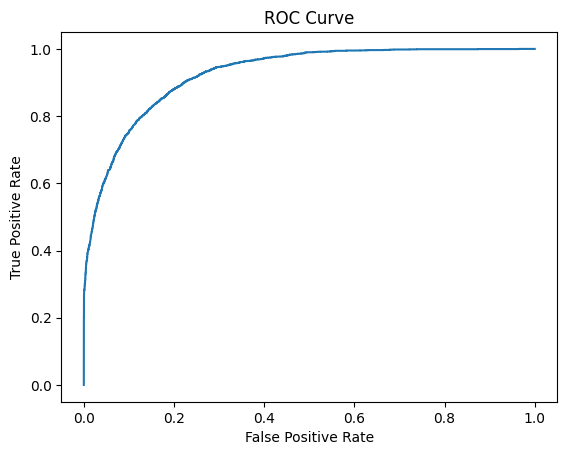

In [28]:
# For your best performing model(XGboost), plot out a ROC curve using your test data. Feel free to use sklearn, matplotlib or any other method in python. Describe what the x-axis & y-axis of the ROC curve tell us about a classifier.

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



The x-axis is the false positive rate and the y-axis is the true positive rate. The ROC curve is a plot of the true positive rate against the false positive rate. The closer the curve is to the top left corner, the better the model is at predicting the positive class. The closer the curve is to the diagonal line, the worse the model is at predicting the positive class.

From the above plot, it is clear that the XGboost model performs well in predicting the true positive results